## Data Analysis for K-MEANS clustering

Purpose: Find relevant dataset columns to increase accuracy of the model

1. Find relevance between columns
  - First, drop no numeric columns
  - Second, use `.corr()` to find relevance between columns
    - Pearson: For linear dataset
    - Spearman: For non-linear dataset
    - Due to complexity and diversity of weather data it is right to use **spearman** but let's use **pearson** also for practice
  - Third, after finding related columns use `PCA` to find which group of columns are related to target
2. Find causality between columns
  - First, drop no numeric columns
  - Second, use `Granger Causality Test`
  - Third, use `DoWhy Test`
  - Fourth, use all
  - Casuality Test shows no difference compare to Relevance -> Remove it


## Import and Setting
1. Basic imports
  - os
  - pandas
  - numpy

2. Visualization
  - matplotlib
  - seaborn as sns
3. Building a model
  - sklearn
    - StandardScaler
    - KMeans

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
import shutil
import os
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Mounted at /content/drive


### Korean 한글 추가

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import unicodedata

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [ ]:
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 8, 'font.family': 'NanumGothic'})
mpl.rcParams['axes.unicode_minus'] = False

# Relevance Check
- `.corr()`
- `PCA`

## `.corr()`

마라도 ['averageTemperature', 'lowestTemperature', 'highestTemperature', 'dailyRainfall', 'maximumWindSpeed']


<ipython-input-5-d4f04fa8728c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related_df['baseDate'] = base_date


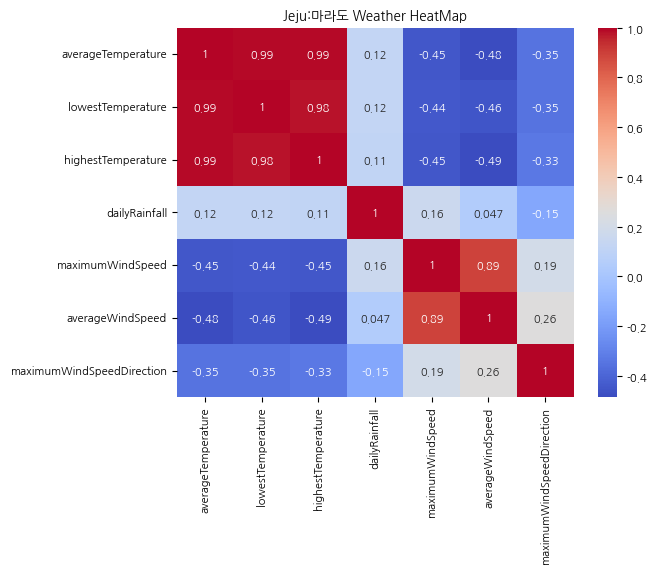

대정 ['averageTemperature', 'lowestTemperature', 'highestTemperature', 'dailyRainfall', 'maximumWindSpeed', 'averageWindSpeed']


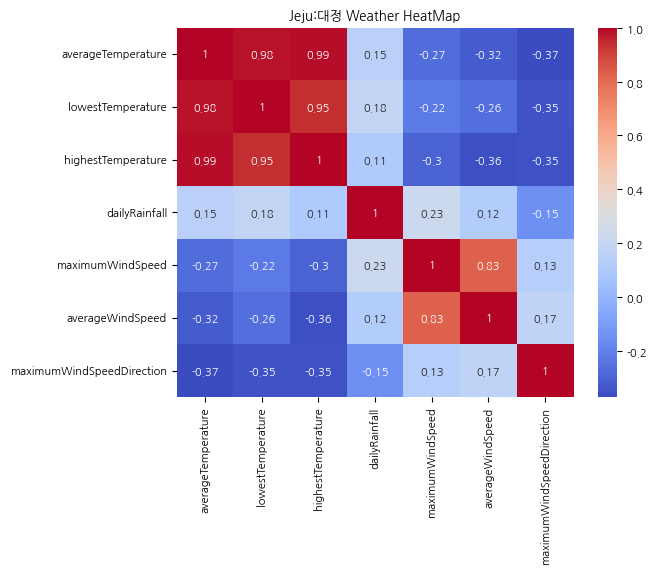

중문 ['averageTemperature', 'lowestTemperature', 'dailyRainfall', 'maximumWindSpeed']


<ipython-input-5-d4f04fa8728c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related_df['baseDate'] = base_date


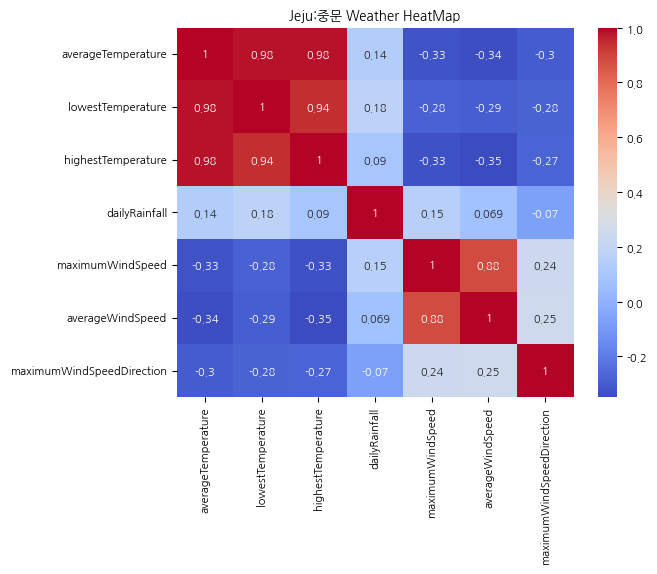

제주남원 ['averageTemperature', 'lowestTemperature', 'dailyRainfall', 'maximumWindSpeed']


<ipython-input-5-d4f04fa8728c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related_df['baseDate'] = base_date


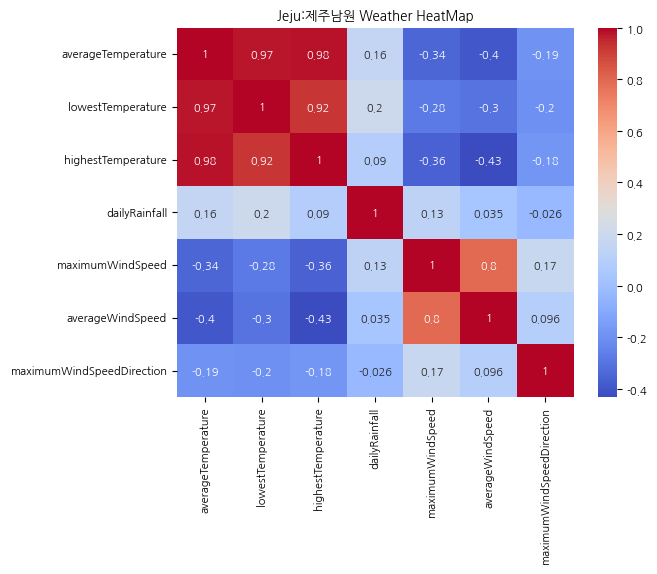

대흘 ['averageTemperature', 'lowestTemperature', 'dailyRainfall', 'maximumWindSpeed', 'averageWindSpeed']


<ipython-input-5-d4f04fa8728c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related_df['baseDate'] = base_date


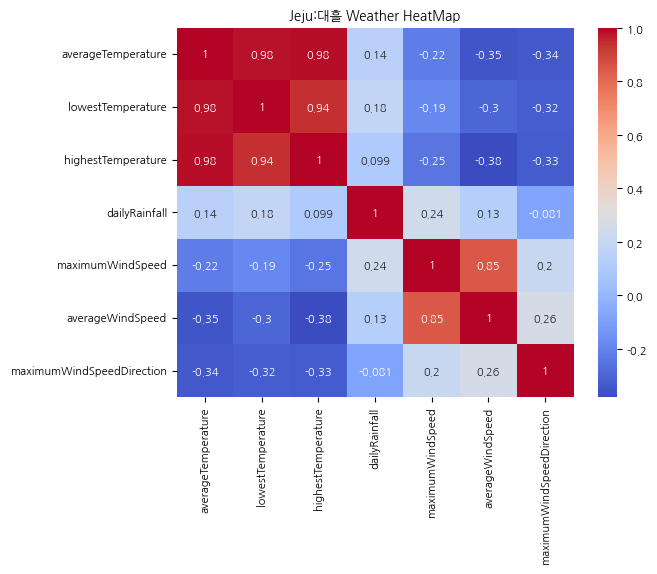

구좌 ['averageTemperature', 'lowestTemperature', 'highestTemperature', 'dailyRainfall', 'maximumWindSpeed', 'averageWindSpeed']


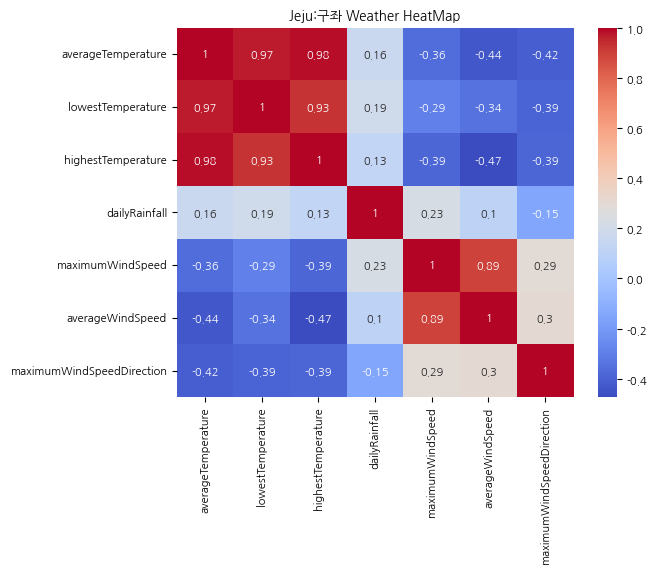

진달래밭 ['averageTemperature', 'lowestTemperature', 'highestTemperature', 'dailyRainfall', 'maximumWindSpeed', 'averageWindSpeed']


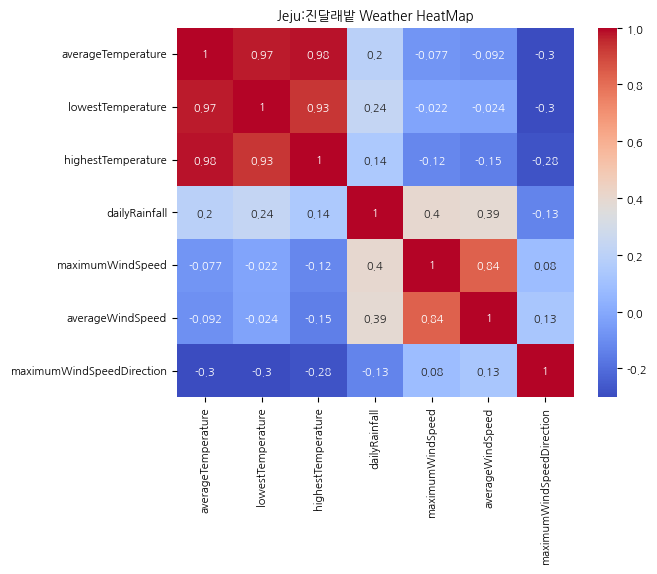

영실 ['dailyRainfall', 'averageTemperature', 'lowestTemperature', 'highestTemperature', 'maximumWindSpeed', 'averageWindSpeed']


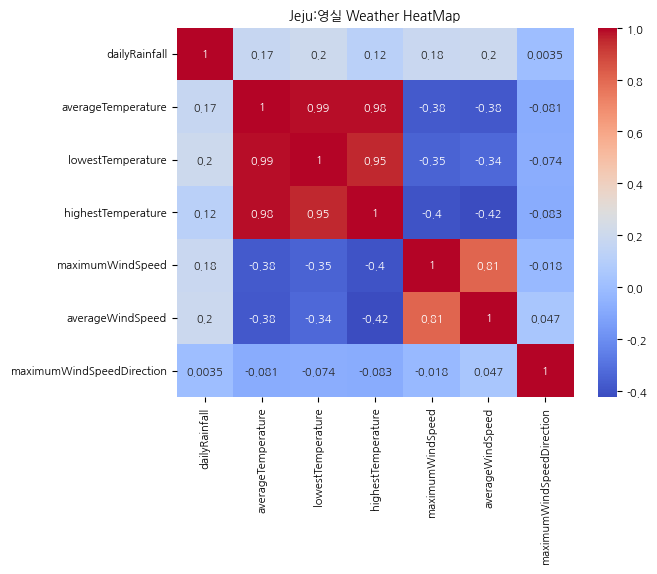

서광 ['averageTemperature', 'lowestTemperature', 'highestTemperature', 'dailyRainfall', 'maximumWindSpeed', 'averageWindSpeed']


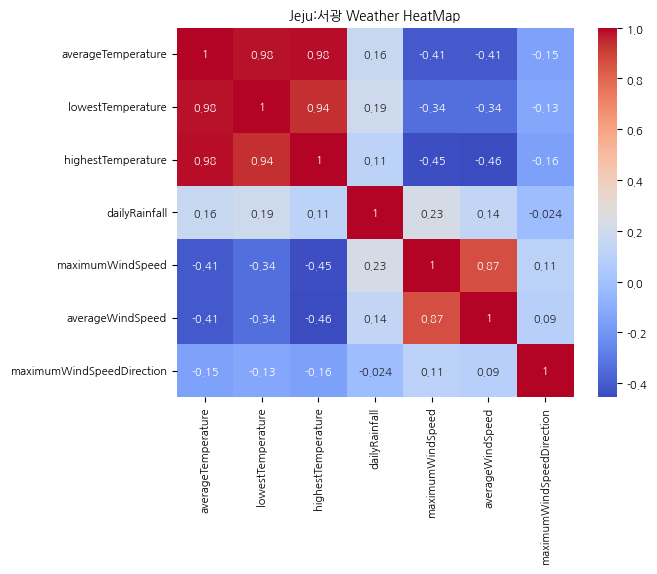

새별오름 ['dailyRainfall', 'averageTemperature', 'lowestTemperature', 'highestTemperature', 'maximumWindSpeed', 'averageWindSpeed']


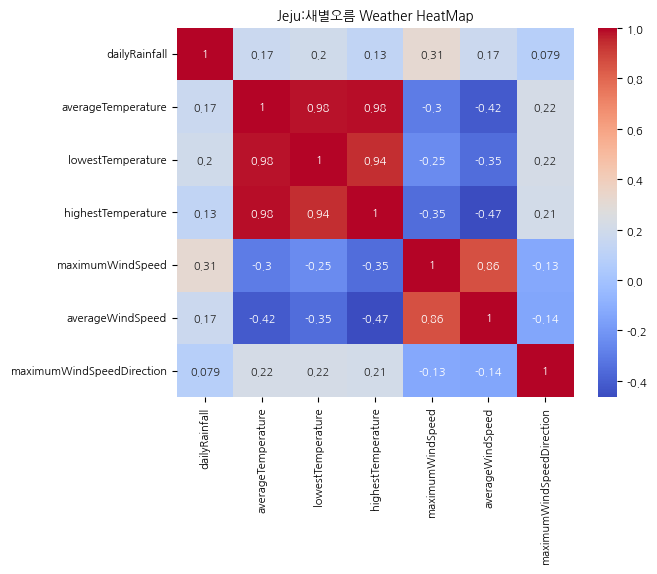

어리목 ['averageTemperature', 'lowestTemperature', 'highestTemperature', 'dailyRainfall', 'maximumWindSpeed', 'averageWindSpeed', 'maximumWindSpeedDirection']


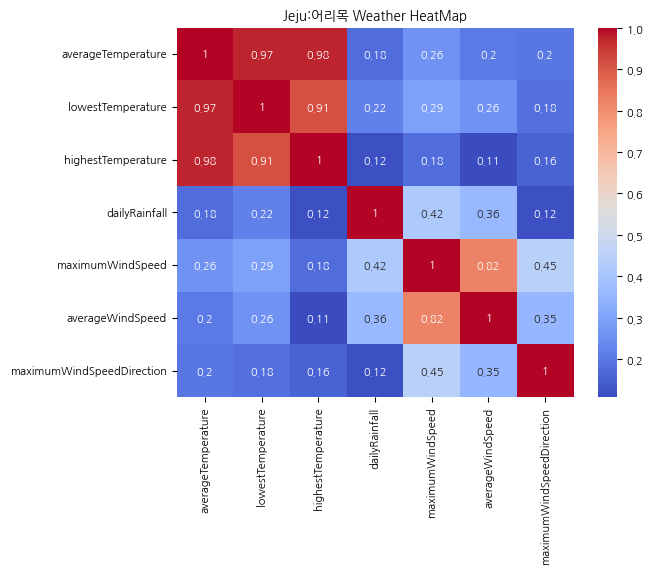

월정 ['averageTemperature', 'lowestTemperature', 'highestTemperature', 'dailyRainfall', 'maximumWindSpeed']


<ipython-input-5-d4f04fa8728c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related_df['baseDate'] = base_date


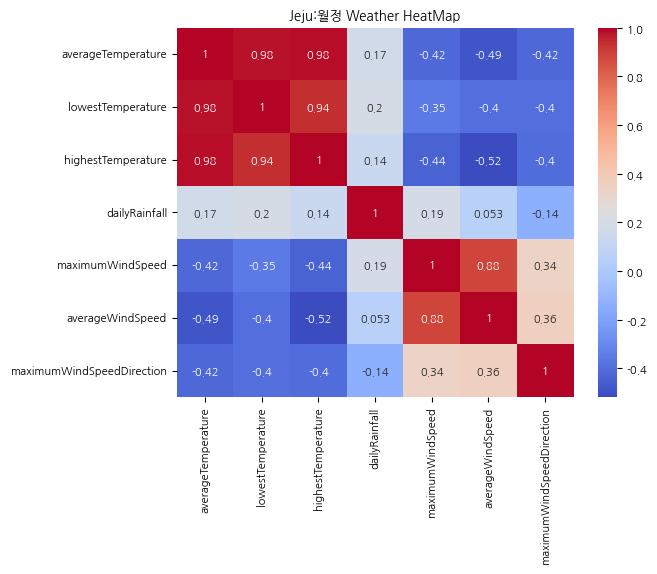

제주가시리 ['averageTemperature', 'lowestTemperature', 'dailyRainfall', 'maximumWindSpeed']


<ipython-input-5-d4f04fa8728c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related_df['baseDate'] = base_date


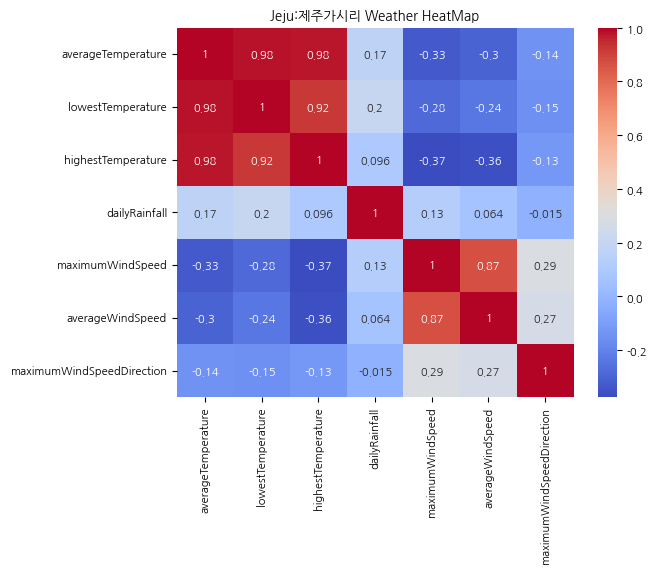

애월 ['averageTemperature', 'lowestTemperature', 'highestTemperature', 'dailyRainfall', 'maximumWindSpeed', 'averageWindSpeed']


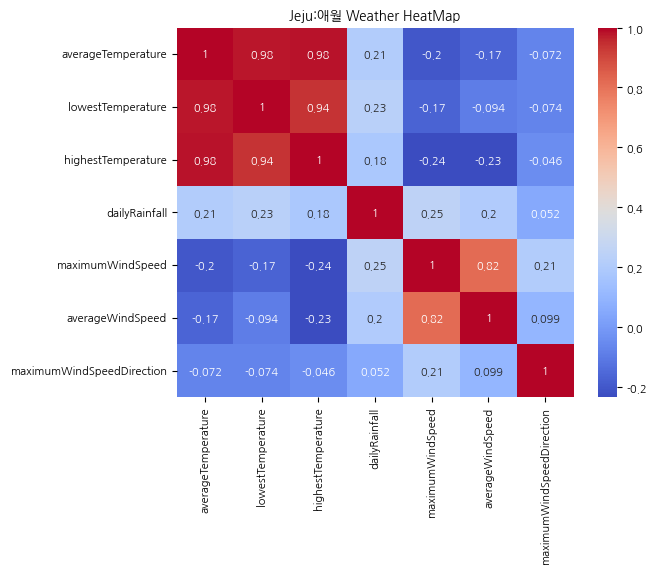

외도 ['averageTemperature', 'lowestTemperature', 'highestTemperature', 'dailyRainfall', 'maximumWindSpeed', 'averageWindSpeed']


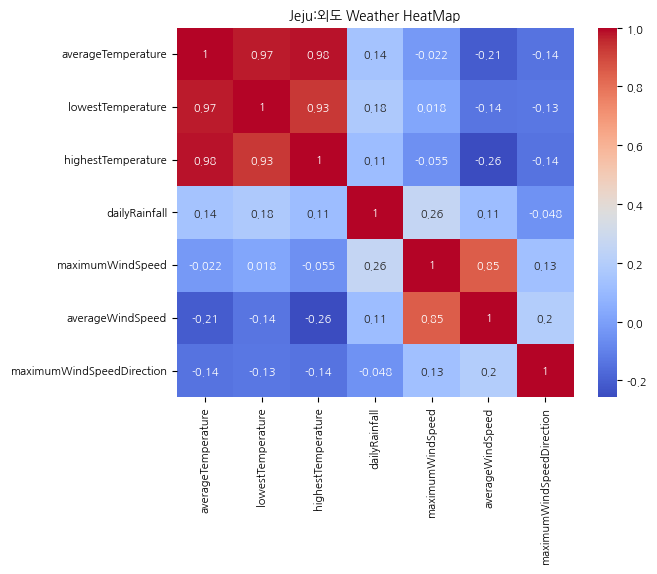

In [ ]:
# Getting csv
directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

for csv_file in csv_files:
  data = pd.read_csv(os.path.join(directory_path, csv_file))
  base_date = data['baseDate']
  data.drop(columns=['baseDate', 'observatoryName', 'lowestTemperatureTime', 'highestTemperatureTime', 'maximumWindSpeedTime'], inplace=True)
  features = data.columns
  # Normalize data
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data[features])

  # Correlation Check
  corr_df = data.corr()

  # heatMap visualization & Image saving
  korean_name = unicodedata.normalize('NFC', csv_file[:-4])
  sns.heatmap(corr_df, annot=True, cmap='coolwarm')
  plt.title(f'Jeju:{korean_name} Weather HeatMap')

  if (not os.path.exists(os.path.join(directory_path, korean_name))):
    os.makedirs(os.path.join(directory_path, korean_name))

  plt.savefig(f'{korean_name}.png')
  image_path = os.path.join(directory_path, os.path.join(korean_name,f'{korean_name}.png'))
  if (os.path.exists(image_path)):
    os.remove(image_path)
  shutil.move(f'{korean_name}.png', image_path)


  # Getting related columns
  relavance_to_dailyRainfall = corr_df['dailyRainfall']
  relatd_columns = []

  for index, value in enumerate(relavance_to_dailyRainfall):
    if (value >= 0.1 and value <= 1.0):
      relatd_columns.append(relavance_to_dailyRainfall.index[index])
  print(korean_name, relatd_columns)
  related_df = data[relatd_columns]
  related_df['baseDate'] = base_date

  new_file_path = os.path.join(directory_path, os.path.join(korean_name,f'relevance_{korean_name}' + '.csv'))
  if (os.path.exists(new_file_path)):
    os.remove(new_file_path)
  related_df.to_csv(new_file_path, index=False)

  plt.show()

## PCA

마라도


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


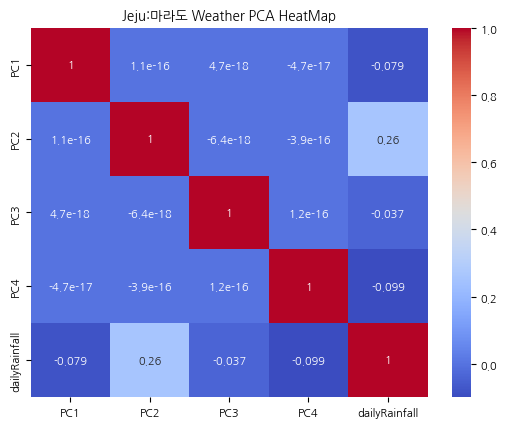

대정


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


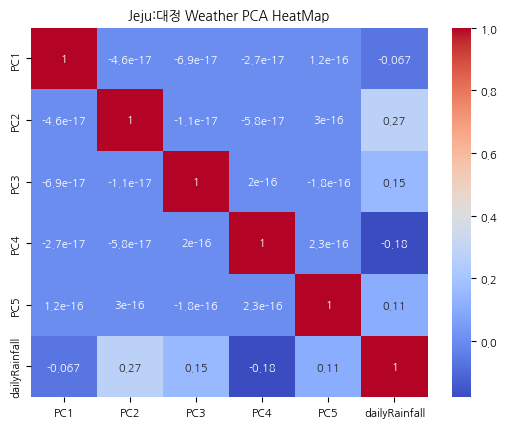

중문


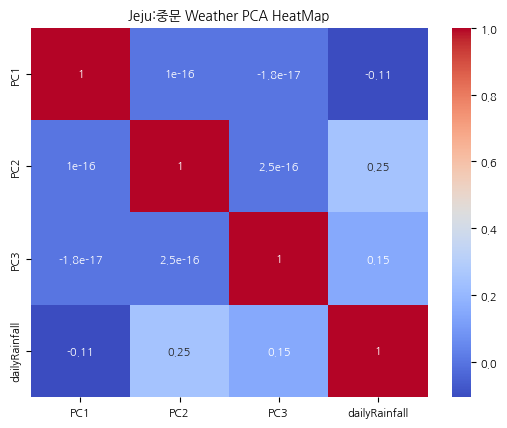

제주남원


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


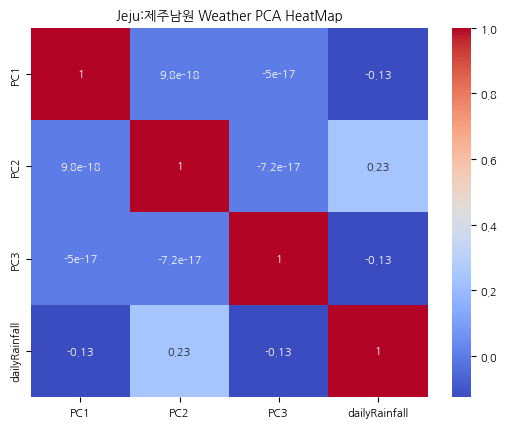

대흘


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


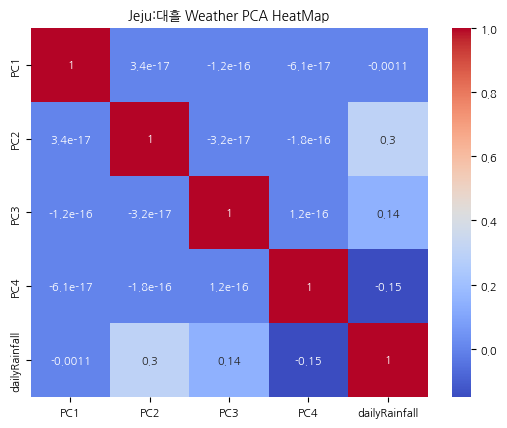

구좌


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


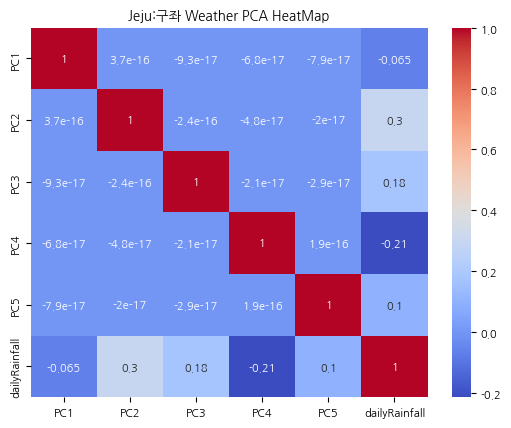

진달래밭


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


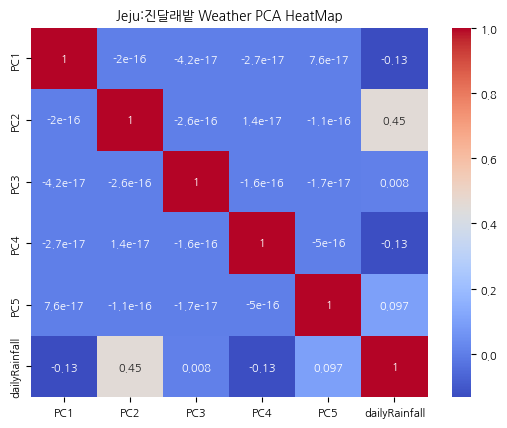

영실


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


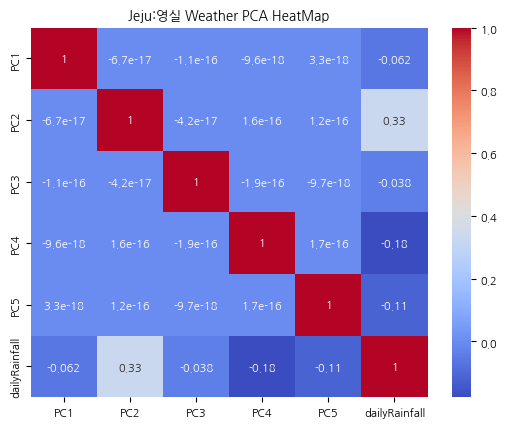

서광


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


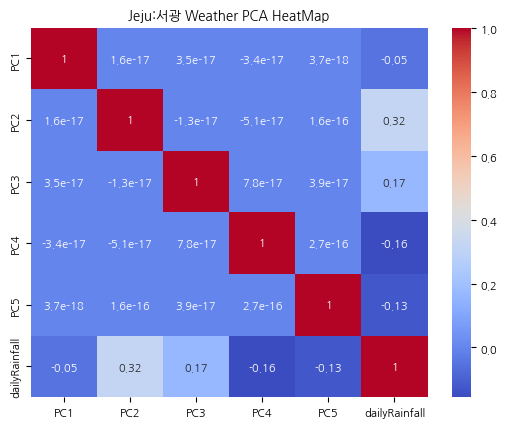

새별오름


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


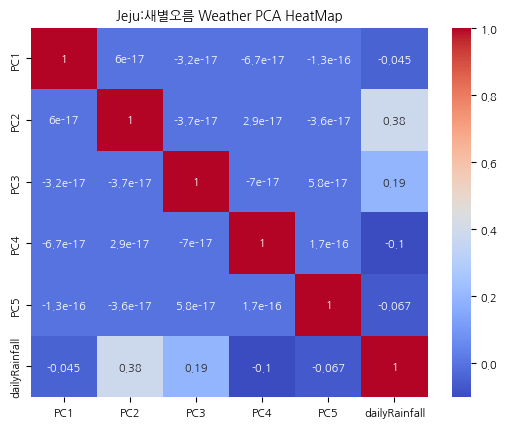

어리목


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


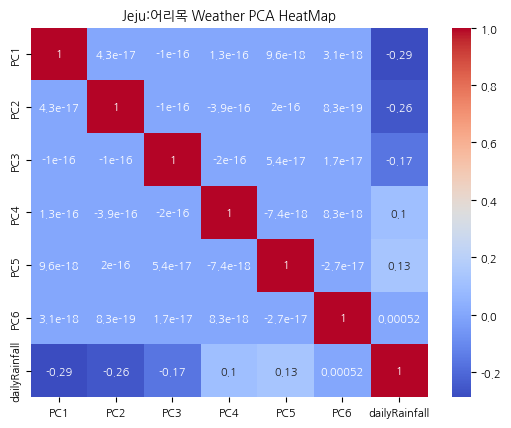

월정


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


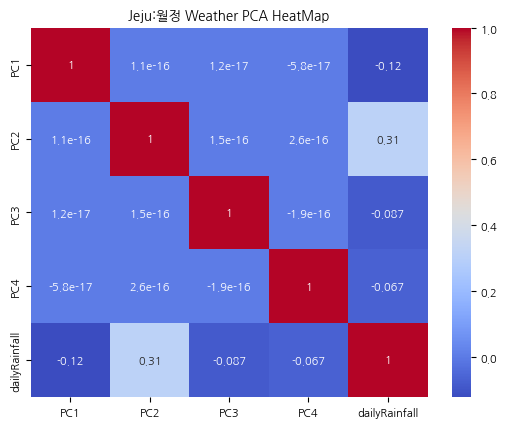

제주가시리


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


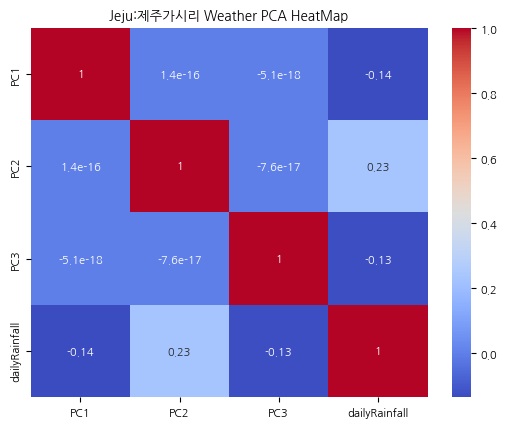

애월


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


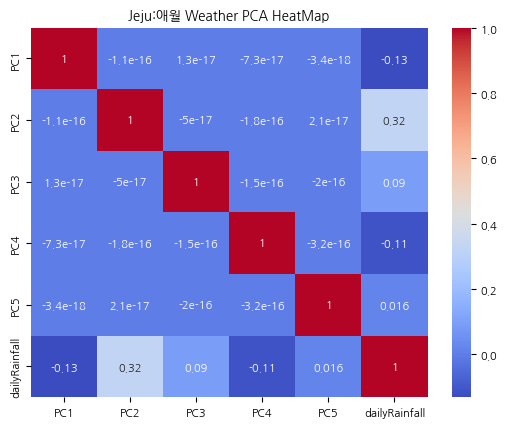

외도


<ipython-input-6-04f4fed9d262>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


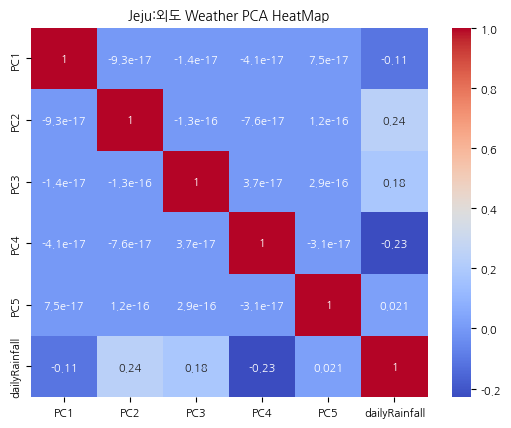

In [ ]:
directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

## PCA Testing 마라도
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

for csv_file in csv_files:
  # Getting csv file
  korean_name = unicodedata.normalize('NFC', csv_file[:-4])
  print(korean_name)
  obs_directory_path = os.path.join(directory_path, korean_name)
  corr_file = os.path.join(obs_directory_path, f'relevance_{korean_name}.csv')
  data = pd.read_csv(corr_file)

  # sort data based on basedate
  data_sorted = data.sort_values(by='baseDate')
  df = data.drop(columns=['baseDate', 'dailyRainfall'])
  df = df.fillna(method='bfill')
  # normalize retrieved values
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(df)

  # pca
  n_components = len(df.columns)
  pc_names = [f'PC{i}' for i in range(1, n_components + 1)]
  pca = PCA(n_components=n_components)
  principal_components = pca.fit_transform(scaled_data)

  loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
  loadings_df = pd.DataFrame(loadings, columns=pc_names, index=df.columns)

  pca_df = pd.DataFrame(data=principal_components, columns=pc_names)
  pca_df['dailyRainfall'] = data['dailyRainfall']

  correlation_matrix = pca_df.corr()

  pc_list = []
  for index, value in enumerate(correlation_matrix['dailyRainfall']):
    if value >= 0.1 and value <= 1.0:
      pc_list.append(correlation_matrix.index[index])

  pc_correlated_df = pca_df[pc_list]
  pc_correlated_df['baseDate'] = data['baseDate']

  # heatMap visualization & Save
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title(f'Jeju:{korean_name} Weather PCA HeatMap')
  plt.savefig(f'pca_{korean_name}.png')

  image_path = os.path.join(obs_directory_path, f'pca_{korean_name}.png')
  if (os.path.exists(image_path)):
    os.remove(image_path)
  shutil.move(f'pca_{korean_name}.png', image_path)
  plt.show()

  new_file_path = os.path.join(obs_directory_path, f'pca_{korean_name}.csv')
  if (os.path.exists(new_file_path)):
      os.remove(new_file_path)
  pc_correlated_df.to_csv(new_file_path, index=False)


## Causlity Check

# Test

In [ ]:
## Relevance Check: PCA - TEST using 마라도
directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
korean_name = unicodedata.normalize('NFC', csv_files[0][:-4])

file_path = os.path.join(directory_path, korean_name, f'relevance_{korean_name}.csv')
data = pd.read_csv(file_path)
data_sorted = data.sort_values(by='baseDate')
df = data.drop(columns=['baseDate'])


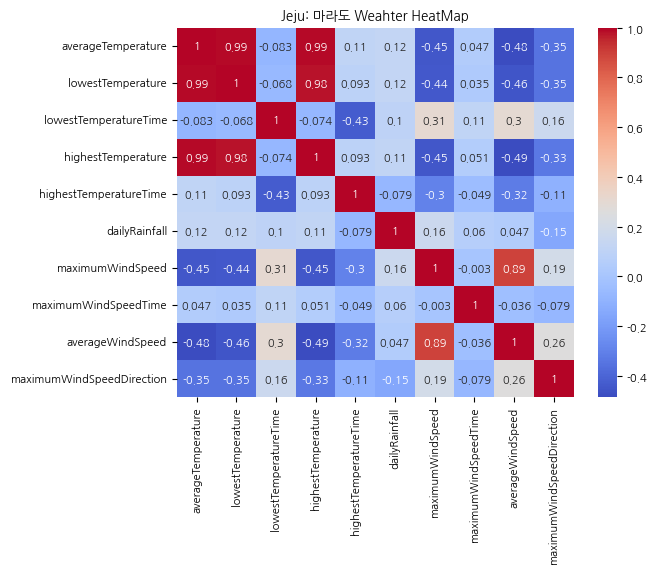

In [ ]:
## Relevance Check: corr() - TEST using 마라도
# Getting csv
directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# data retreiving
data = pd.read_csv(os.path.join(directory_path, csv_files[0]))
data.drop(columns=['baseDate', 'observatoryName'], inplace=True)
features = data.columns


# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Correlation Check
corr_df = data.corr()

# Getting related columns
relavance_to_dailyRainfall = corr_df['dailyRainfall']
relatd_columns = []

for index, value in enumerate(relavance_to_dailyRainfall):
  if (value >= 0.1 and value <= 1.0):
    relatd_columns.append(relavance_to_dailyRainfall.index[index])

# related_df to csv and google drive
related_df = data[relatd_columns]

# heatMap visualization
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
korean_name = unicodedata.normalize('NFC', csv_files[0][:-4])
plt.title(f'Jeju: {korean_name} Weahter HeatMap')

plt.show()

마라도


<ipython-input-9-f947922f7375>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_correlated_df['baseDate'] = data['baseDate']


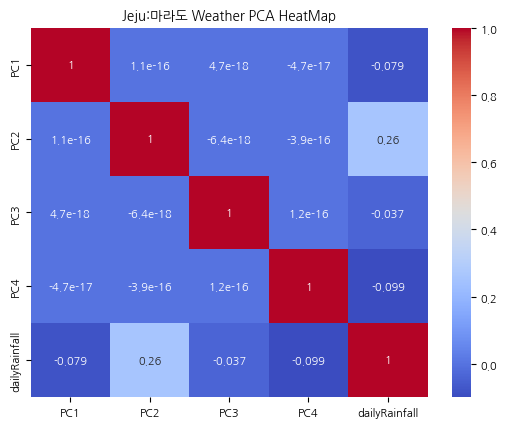

In [ ]:
## PCA Testing 마라도
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# Getting csv file
csv_file = csv_files[0]
korean_name = unicodedata.normalize('NFC', csv_file[:-4])
print(korean_name)
obs_directory_path = os.path.join(directory_path, korean_name)
corr_file = os.path.join(obs_directory_path, f'relevance_{korean_name}.csv')
data = pd.read_csv(corr_file)

# sort data based on basedate
data_sorted = data.sort_values(by='baseDate')
df = data.drop(columns=['baseDate', 'dailyRainfall'])

# normalize retrieved values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# pca pars
# n_components
n_components = len(df.columns)
pc_names = [f'PC{i}' for i in range(1, n_components + 1)]
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=pc_names, index=df.columns)

pca_df = pd.DataFrame(data=principal_components, columns=pc_names)
pca_df['dailyRainfall'] = data['dailyRainfall']

correlation_matrix = pca_df.corr()

pc_list = []
for index, value in enumerate(correlation_matrix['dailyRainfall']):
  if value >= 0.1 and value <= 1.0:
    pc_list.append(correlation_matrix.index[index])

pc_correlated_df = pca_df[pc_list]
pc_correlated_df['baseDate'] = data['baseDate']

# heatMap visualization & Save
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f'Jeju:{korean_name} Weather PCA HeatMap')
plt.savefig(f'pca_{korean_name}.png')

image_path = os.path.join(obs_directory_path, f'pca_{korean_name}.png')
if (os.path.exists(image_path)):
  os.remove(image_path)
shutil.move(f'pca_{korean_name}.png', image_path)
plt.show()

new_file_path = os.path.join(obs_directory_path, f'pca_{korean_name}.csv')
if (os.path.exists(new_file_path)):
    os.remove(new_file_path)
pc_correlated_df.to_csv(new_file_path, index=False)

In [ ]:
!pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 6.0 MB/s eta 0:00:00


## DoWhy Test: 마라도

In [ ]:
## DoWhy Causality Test
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
korean_name = csv_files[0][:-4]
island_dir = os.path.join(directory_path, korean_name)
island_files = [f for f in os.listdir(island_dir) if f.endswith('.csv') and f.startswith('relevance')]

csv_file = os.path.join(island_dir, island_files[0])
data = pd.read_csv(csv_file)
data_sorted = data.sort_values(by='baseDate')
cause_df = data.drop(columns=['baseDate', 'dailyRainfall'])
rain_df = data[['dailyRainfall']]

for cause in cause_df.columns:
  model = CausalModel(
      data=data_sorted,
      treatment=cause,
      outcome='dailyRainfall'
  )

  identified_estimand = model.identify_effect()
  estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
  print(f"Causal Estimate of {cause} on A: {estimate.value}")
  refutation = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
  print(refutation)



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Causal Estimate of averageTemperature on A: 0.24293428556668895


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_

Refute: Use a Placebo Treatment
Estimated effect:0.24293428556668895
New effect:0.0
p value:1.0

Causal Estimate of lowestTemperature on A: 0.23221432336520714


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_

Refute: Use a Placebo Treatment
Estimated effect:0.23221432336520714
New effect:0.0
p value:1.0

Causal Estimate of highestTemperature on A: 0.22360480172372765


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_

Refute: Use a Placebo Treatment
Estimated effect:0.22360480172372765
New effect:0.0
p value:1.0

Causal Estimate of maximumWindSpeed on A: 0.4628134487387898


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_

Refute: Use a Placebo Treatment
Estimated effect:0.4628134487387898
New effect:0.0
p value:1.0



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
